# Lambda Functions

In [13]:
lista = [3,4,534]

In [14]:
mean(lista)

NameError: name 'mean' is not defined

In [16]:
sum(lista)

541

In [17]:
sum(lista)/len(lista)

180.33333333333334

In [21]:
lista

[3, 4, 534]

In [28]:
mean_lista = lambda lista: sum(lista)/len(lista)

In [29]:
mean_lista([34,3])

18.5

In [23]:
def mean(lista):
    
    suma = sum(lista)
    lon = len(lista)
    result = suma/lon

    return result

In [24]:
mean(lista)

180.33333333333334

In [26]:
mean([34,34,53])

40.333333333333336

In [30]:
suma = lambda x,y: x+y

In [31]:
suma(3,4)

7

In [40]:
a = []

for i in range(10):
    if i%2==0:
        a.append(i)

a

[0, 2, 4, 6, 8]

In [41]:
[i for i in range(10)]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [43]:
[i for i in range(10) if i%2==0]

[0, 2, 4, 6, 8]

In [52]:
[i**2 if i%2==0 else i**3 for i in range(10)]

[0, 1, 4, 27, 16, 125, 36, 343, 64, 729]

In [44]:
import seaborn as sns

In [46]:
df = sns.load_dataset('tips')

In [48]:
for i in df.groupby('sex'):
    print(i)

('Male',      total_bill   tip   sex smoker  day    time  size
1         10.34  1.66  Male     No  Sun  Dinner     3
2         21.01  3.50  Male     No  Sun  Dinner     3
3         23.68  3.31  Male     No  Sun  Dinner     2
5         25.29  4.71  Male     No  Sun  Dinner     4
6          8.77  2.00  Male     No  Sun  Dinner     2
..          ...   ...   ...    ...  ...     ...   ...
236       12.60  1.00  Male    Yes  Sat  Dinner     2
237       32.83  1.17  Male    Yes  Sat  Dinner     2
239       29.03  5.92  Male     No  Sat  Dinner     3
241       22.67  2.00  Male    Yes  Sat  Dinner     2
242       17.82  1.75  Male     No  Sat  Dinner     2

[157 rows x 7 columns])
('Female',      total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
11        35.26  5.00  Female     No   Sun  Dinner     4
14        14.83  3.02  Female     No   Sun  Dinner     2
16        10.33  1.67 

In [49]:
[i[1].total_bill.mean() for i in df.groupby('sex')]

[20.744076433121016, 18.056896551724133]

# Groupby de un groupby

In [53]:
import pandas as pd

In [56]:
df = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', sep='|')

In [61]:
df.groupby(['gender', 'occupation'])

In [63]:
df.groupby(['gender', 'occupation']).get_group('M')

ValueError: must supply a tuple to get_group with multiple grouping keys

In [64]:
df.groupby(['gender', 'occupation']).get_group(('M', 'technician'))

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
3,4,24,M,technician,43537
43,44,26,M,technician,46260
76,77,30,M,technician,29379
142,143,42,M,technician,08832
196,197,55,M,technician,75094
243,244,28,M,technician,80525
293,294,34,M,technician,92110
310,311,32,M,technician,73071
324,325,48,M,technician,02139


In [67]:
df.groupby(['occupation', 'gender']).size()

occupation     gender
administrator  F          36
               M          43
artist         F          13
               M          15
doctor         M           7
educator       F          26
               M          69
engineer       F           2
               M          65
entertainment  F           2
               M          16
executive      F           3
               M          29
healthcare     F          11
               M           5
homemaker      F           6
               M           1
lawyer         F           2
               M          10
librarian      F          29
               M          22
marketing      F          10
               M          16
none           F           4
               M           5
other          F          36
               M          69
programmer     F           6
               M          60
retired        F           1
               M          13
salesman       F           3
               M           9
scientist      F     

In [68]:
df.groupby(['occupation', 'gender']).size().sum()

943

In [70]:
df.groupby(['occupation', 'gender']).size().groupby('occupation')

In [71]:
df.groupby(['occupation', 'gender']).size().groupby('occupation').sum()

occupation
administrator     79
artist            28
doctor             7
educator          95
engineer          67
entertainment     18
executive         32
healthcare        16
homemaker          7
lawyer            12
librarian         51
marketing         26
none               9
other            105
programmer        66
retired           14
salesman          12
scientist         31
student          196
technician        27
writer            45
dtype: int64

In [75]:
res = df.groupby(['occupation', 'gender']).size().groupby('occupation').apply(lambda x: x/sum(x))

In [81]:
res.reset_index(name='ratio').query('gender == "M"')

,occupation,gender,ratio
1,administrator,M,0.544304
3,artist,M,0.535714
4,doctor,M,1.000000
6,educator,M,0.726316
8,engineer,M,0.970149
10,entertainment,M,0.888889
12,executive,M,0.906250
14,healthcare,M,0.312500
16,homemaker,M,0.142857
18,lawyer,M,0.833333


In [83]:
res.reset_index(name='ratio').query('gender == "M"').style.background_gradient('Blues')

,occupation,gender,ratio
1,administrator,M,0.544304
3,artist,M,0.535714
4,doctor,M,1.000000
6,educator,M,0.726316
8,engineer,M,0.970149
10,entertainment,M,0.888889
12,executive,M,0.906250
14,healthcare,M,0.312500
16,homemaker,M,0.142857
18,lawyer,M,0.833333


In [84]:
df

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [82]:
res.reset_index(name='ratio').query('gender == "M"').style.gradient_background('Blues')

AttributeError: 'Styler' object has no attribute 'gradient_background'

In [78]:
(res*100).to_frame()

0
occupation    gender            
administrator F        45.569620
              M        54.430380
artist        F        46.428571
              M        53.571429
doctor        M       100.000000
educator      F        27.368421
              M        72.631579
engineer      F         2.985075
              M        97.014925
entertainment F        11.111111
              M        88.888889
executive     F         9.375000
              M        90.625000
healthcare    F        68.750000
              M        31.250000
homemaker     F        85.714286
              M        14.285714
lawyer        F        16.666667
              M        83.333333
librarian     F        56.862745
              M        43.137255
marketing     F        38.461538
              M        61.538462
none          F        44.444444
              M        55.555556
other         F        34.285714
              M        65.714286
programmer    F         9.090909
              M        90.909091
retired       F         7.142857
              M        92.857143
salesman      F        25.000000
              M        75.000000
scientist     F         9.677419
              M        90.322581
student       F        30.612245
              M        69.387755
technician    F         3.703704
              M        96.296296
writer        F        42.222222
              M        57.777778

In [1]:
import seaborn as sns

In [3]:
df = sns.load_dataset('tips')

In [5]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [10]:
df.sex == Female

NameError: name 'Female' is not defined

In [12]:
type(df.sex == 'Female')

pandas.core.series.Series

In [14]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [15]:
df[df.sex == 'Female']

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
11,35.26,5.00,Female,No,Sun,Dinner,4
14,14.83,3.02,Female,No,Sun,Dinner,2
16,10.33,1.67,Female,No,Sun,Dinner,3
...,...,...,...,...,...,...,...
226,10.09,2.00,Female,Yes,Fri,Lunch,2
229,22.12,2.88,Female,Yes,Sat,Dinner,2
238,35.83,4.67,Female,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2


In [16]:
mask = df.sex == 'Female'

In [18]:
df[df.sex == 'Female']

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
11,35.26,5.00,Female,No,Sun,Dinner,4
14,14.83,3.02,Female,No,Sun,Dinner,2
16,10.33,1.67,Female,No,Sun,Dinner,3
...,...,...,...,...,...,...,...
226,10.09,2.00,Female,Yes,Fri,Lunch,2
229,22.12,2.88,Female,Yes,Sat,Dinner,2
238,35.83,4.67,Female,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2


In [17]:
df[mask]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
11,35.26,5.00,Female,No,Sun,Dinner,4
14,14.83,3.02,Female,No,Sun,Dinner,2
16,10.33,1.67,Female,No,Sun,Dinner,3
...,...,...,...,...,...,...,...
226,10.09,2.00,Female,Yes,Fri,Lunch,2
229,22.12,2.88,Female,Yes,Sat,Dinner,2
238,35.83,4.67,Female,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2


In [28]:
df.query('sex == "Female"').to_csv('nuevo.csv')

In [23]:
df.values

array([[16.99, 1.01, 'Female', ..., 'Sun', 'Dinner', 2],
       [10.34, 1.66, 'Male', ..., 'Sun', 'Dinner', 3],
       [21.01, 3.5, 'Male', ..., 'Sun', 'Dinner', 3],
       ...,
       [22.67, 2.0, 'Male', ..., 'Sat', 'Dinner', 2],
       [17.82, 1.75, 'Male', ..., 'Sat', 'Dinner', 2],
       [18.78, 3.0, 'Female', ..., 'Thur', 'Dinner', 2]], dtype=object)

In [26]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [24]:
type(df.values)

numpy.ndarray

In [25]:
numpy

NameError: name 'numpy' is not defined

In [29]:
df.query('tip > Female')

UndefinedVariableError: name 'Female' is not defined

In [29]:
df.query('tip > Female')

UndefinedVariableError: name 'Female' is not defined

In [31]:
import sys

In [33]:
randomList = ['a', 0, 2]

In [34]:
randomList

['a', 0, 2]

In [35]:
for entry in randomList:
    print(entry)

a
0
2


In [37]:
for entry in randomList:
    print(entry)
    try:
        print("The entry is", entry)
    except:
        print('hola')

a
The entry is a
0
The entry is 0
2
The entry is 2


In [40]:
1/int('a')

ValueError: invalid literal for int() with base 10: 'a'

In [41]:
1/int(0)

ZeroDivisionError: division by zero

In [39]:
for entry in randomList:
    print(entry)
    try:
        print("The entry is", entry)
        r = 1/int(entry)
    except:
        print('hola')

a
The entry is a
hola
0
The entry is 0
hola
2
The entry is 2


In [39]:
for entry in randomList:
    print(entry)
    try:
        print("The entry is", entry)
        r = 1/int(entry)
    except:
        print('hola')

a
The entry is a
hola
0
The entry is 0
hola
2
The entry is 2


In [42]:
# import module sys to get the type of exception
import sys

randomList = ['a', 0, 2]

for entry in randomList:
    try:
        print("The entry is", entry)
        r = 1/int(entry)
        break
    except:
        print("Oops!", sys.exc_info()[0], "occurred.")
        print("Next entry.")
        print()
print("The reciprocal of", entry, "is", r)

The entry is a
Oops! <class 'ValueError'> occurred.
Next entry.

The entry is 0
Oops! <class 'ZeroDivisionError'> occurred.
Next entry.

The entry is 2
The reciprocal of 2 is 0.5


In [43]:
# import module sys to get the type of exception
import sys

randomList = ['a', 0, 2]

for entry in randomList:
    try:
        print("The entry is", entry)
        r = 1/int(entry)
        break
    except ZeroDivisionError:
        print("Oops!", sys.exc_info()[0], "occurred.")
        print("Next entry.")
        print()
print("The reciprocal of", entry, "is", r)

The entry is a


ValueError: invalid literal for int() with base 10: 'a'

In [44]:
# import module sys to get the type of exception
import sys

randomList = ['a', 0, 2]

for entry in randomList:
    try:
        print("The entry is", entry)
        r = 1/int(entry)
        break
    except (ZeroDivisionError, ValueError):
        print("Oops!", sys.exc_info()[0], "occurred.")
        print("Next entry.")
        print()
print("The reciprocal of", entry, "is", r)

The entry is a
Oops! <class 'ValueError'> occurred.
Next entry.

The entry is 0
Oops! <class 'ZeroDivisionError'> occurred.
Next entry.

The entry is 2
The reciprocal of 2 is 0.5


In [45]:
# import module sys to get the type of exception
import sys

randomList = ['a', 0, 2]

for entry in randomList:
    try:
        print("The entry is", entry)
        r = 1/int(entry)
        break
    except ZeroDivisionError or ValueError:
        print("Oops!", sys.exc_info()[0], "occurred.")
        print("Next entry.")
        print()
print("The reciprocal of", entry, "is", r)

The entry is a


ValueError: invalid literal for int() with base 10: 'a'

In [43]:
# import module sys to get the type of exception
import sys

randomList = ['a', 0, 2]

for entry in randomList:
    try:
        print("The entry is", entry)
        r = 1/int(entry)
        break
    except ZeroDivisionError:
        print("Oops!", sys.exc_info()[0], "occurred.")
        print("Next entry.")
        print()
print("The reciprocal of", entry, "is", r)

The entry is a


ValueError: invalid literal for int() with base 10: 'a'

In [1]:
import seaborn as sns

In [3]:
name='hol'

In [4]:
f'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/{name}.csv'

'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/hol.csv'

In [5]:
import pandas as pd

In [6]:
pd.read_csv(f'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/{name}.csv')

HTTPError: HTTP Error 404: Not Found

In [46]:
sns.load_dataset(name='hol')

ValueError: 'hol' is not one of the example datasets.

In [7]:
# program to print the reciprocal of even numbers

try:
    num = int(input("Enter a number: "))
    assert num % 2 == 0
except:
    print("Not an even number!")
else:
    reciprocal = 1/num
    print(reciprocal)

Enter a number:  3


Not an even number!


In [8]:
# program to print the reciprocal of even numbers

try:
    num = int(input("Enter a number: "))
    assert num % 2 == 0
except:
    print("Not an even number!")
else:
    reciprocal = 1/num
    print(reciprocal)

Enter a number:  0


ZeroDivisionError: division by zero

In [48]:
nombre = 'Sandra'

In [49]:
f'hola {nombre}'

'hola Sandra'

In [55]:
"Shepherd {} is on duty.".format(nombre)

'Shepherd Sandra is on duty.'

In [60]:
shepherd = 'Sandra'

In [63]:
age = 99

In [64]:
"Shepherd %s is %d years old." % (shepherd, age)

'Shepherd Sandra is 99 years old.'

In [65]:
f"Shepherd {shepherd} is {age} years old."

'Shepherd Sandra is 99 years old.'

In [ ]:
f'

In [55]:
"Shepherd {} is on duty.".format(nombre)

'Shepherd Sandra is on duty.'

In [53]:
'hola %s'.format(nombre)

'hola %s'

In [51]:
'hola ' + nombre

'hola Sandra'

# RAS `.groupby()` & el `size()`

In [28]:
df.groupby('sex')

In [29]:
df.groupby('sex').count()

,total_bill,tip,smoker,day,time,size
sex,,,,,,
Male,157,157,157,157,157,157
Female,87,87,87,87,87,87


In [30]:
df.groupby('sex').size()

sex
Male      157
Female     87
dtype: int64

# `describe()` vs `agg()`

In [11]:
import seaborn as sns

In [13]:
df = sns.load_dataset('tips')

In [ ]:
df

In [21]:
df.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [26]:
df.select_dtypes(exclude='category').agg(func=['mean', 'max'])

,total_bill,tip,size
mean,19.785943,2.998279,2.569672
max,50.810000,10.000000,6.000000


In [25]:
df.select_dtypes(exclude='string')

/var/folders/3v/9strff0n11gg43ttfl_2d1p80000gn/T/ipykernel_4124/3355031600.py:1: FutureWarning: ['sex', 'smoker', 'day', 'time'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.select_dtypes(exclude='string').agg(func=['mean', 'max'])


,total_bill,tip,size
mean,19.785943,2.998279,2.569672
max,50.810000,10.000000,6.000000


In [17]:
df.agg(func=['mean', 'max'])

/var/folders/3v/9strff0n11gg43ttfl_2d1p80000gn/T/ipykernel_4124/1265704916.py:1: FutureWarning: ['sex', 'smoker', 'day', 'time'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.agg(func=['mean', 'max'])


,total_bill,tip,size
mean,19.785943,2.998279,2.569672
max,50.810000,10.000000,6.000000


In [17]:
df.agg(func=['mean', 'max'])

/var/folders/3v/9strff0n11gg43ttfl_2d1p80000gn/T/ipykernel_4124/1265704916.py:1: FutureWarning: ['sex', 'smoker', 'day', 'time'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.agg(func=['mean', 'max'])


,total_bill,tip,size
mean,19.785943,2.998279,2.569672
max,50.810000,10.000000,6.000000


In [19]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [18]:
df[['total_bill', 'tip', 'size']].agg(func=['mean', 'max'])

,total_bill,tip,size
mean,19.785943,2.998279,2.569672
max,50.810000,10.000000,6.000000


In [15]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [16]:
df.describe().loc[['mean', 'max']]

,total_bill,tip,size
mean,19.785943,2.998279,2.569672
max,50.810000,10.000000,6.000000


In [9]:
df

NameError: name 'df' is not defined

# `round()` & accesibilidad

In [31]:
df.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [32]:
df.corr().round(2)

,total_bill,tip,size
total_bill,1.00,0.68,0.60
tip,0.68,1.00,0.49
size,0.60,0.49,1.00


In [33]:
dfres = df.corr().round(2)

In [34]:
dfres.style.background_gradient(cmap='Blues')

,total_bill,tip,size
total_bill,1.000000,0.680000,0.600000
tip,0.680000,1.000000,0.490000
size,0.600000,0.490000,1.000000


In [34]:
dfres.style.background_gradient(cmap='Blues')

,total_bill,tip,size
total_bill,1.000000,0.680000,0.600000
tip,0.680000,1.000000,0.490000
size,0.600000,0.490000,1.000000


# Calcular haciendo `groupby()` vs `query()`

In [3]:
import pandas as pd

In [5]:
df = pd.DataFrame(raw_data)

In [8]:
df.query('regiment == "Dragoons"').mean()

/var/folders/3v/9strff0n11gg43ttfl_2d1p80000gn/T/ipykernel_4294/3223210269.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.query('regiment == "Dragoons"').mean()


preTestScore     15.5
postTestScore    61.5
dtype: float64

In [9]:
df.groupby('regiment').mean()

,preTestScore,postTestScore
regiment,,
Dragoons,15.50,61.5
Nighthawks,15.25,59.5
Scouts,2.50,66.0


In [10]:
df.groupby('regiment').mean().loc['Dragoons']

preTestScore     15.5
postTestScore    61.5
Name: Dragoons, dtype: float64

In [6]:
df

,regiment,company,name,preTestScore,postTestScore
0,Nighthawks,1st,Miller,4,25
1,Nighthawks,1st,Jacobson,24,94
2,Nighthawks,2nd,Ali,31,57
3,Nighthawks,2nd,Milner,2,62
4,Dragoons,1st,Cooze,3,70
5,Dragoons,1st,Jacon,4,25
6,Dragoons,2nd,Ryaner,24,94
7,Dragoons,2nd,Sone,31,57
8,Scouts,1st,Sloan,2,62
9,Scouts,1st,Piger,3,70


# %Y para las fechas

In [35]:
import pandas as pd

In [111]:
df = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv')

In [115]:
df.Date = pd.to_datetime(df.Date)

In [119]:
df.Date.dt.strftime(format='%h')

TypeError: strftime() got an unexpected keyword argument 'format'

In [120]:
df.Date.dt.strftime(format='%H')

TypeError: strftime() got an unexpected keyword argument 'format'

In [121]:
df.Date.dt.strftime(format='%Y')

TypeError: strftime() got an unexpected keyword argument 'format'

In [124]:
df.Date

0      2014-07-08
1      2014-07-07
2      2014-07-03
3      2014-07-02
4      2014-07-01
          ...    
8460   1980-12-18
8461   1980-12-17
8462   1980-12-16
8463   1980-12-15
8464   1980-12-12
Name: Date, Length: 8465, dtype: datetime64[ns]

In [ ]:
'8 de julio de 2014'

In [127]:
df.Date.dt.strftime(date_format='%b')

0       Jul
1       Jul
2       Jul
3       Jul
4       Jul
       ... 
8460    Dec
8461    Dec
8462    Dec
8463    Dec
8464    Dec
Name: Date, Length: 8465, dtype: object

In [130]:
df.Date.dt.strftime(date_format='%-d de %B de %Y')

0            8 de July de 2014
1            7 de July de 2014
2            3 de July de 2014
3            2 de July de 2014
4            1 de July de 2014
                 ...          
8460    18 de December de 1980
8461    17 de December de 1980
8462    16 de December de 1980
8463    15 de December de 1980
8464    12 de December de 1980
Name: Date, Length: 8465, dtype: object

In [130]:
df.Date.dt.strftime(date_format='%-d de %B de %Y')

0            8 de July de 2014
1            7 de July de 2014
2            3 de July de 2014
3            2 de July de 2014
4            1 de July de 2014
                 ...          
8460    18 de December de 1980
8461    17 de December de 1980
8462    16 de December de 1980
8463    15 de December de 1980
8464    12 de December de 1980
Name: Date, Length: 8465, dtype: object

In [131]:
import locale
locale.setlocale(locale.LC_ALL,'es_ES.UTF-8')

'es_ES.UTF-8'

# extraer columnas de series lista a pandas dataframe

In [132]:
df.Date.dt.strftime(date_format='%-d de %B de %Y')

0            8 de julio de 2014
1            7 de julio de 2014
2            3 de julio de 2014
3            2 de julio de 2014
4            1 de julio de 2014
                 ...           
8460    18 de diciembre de 1980
8461    17 de diciembre de 1980
8462    16 de diciembre de 1980
8463    15 de diciembre de 1980
8464    12 de diciembre de 1980
Name: Date, Length: 8465, dtype: object

In [123]:
df.Date.dt.strftime(date_format='%s')

0       1404770400
1       1404684000
2       1404338400
3       1404252000
4       1404165600
           ...    
8460     345942000
8461     345855600
8462     345769200
8463     345682800
8464     345423600
Name: Date, Length: 8465, dtype: object

In [122]:
df.Date.dt.strftime(date_format='%Y')

0       2014
1       2014
2       2014
3       2014
4       2014
        ... 
8460    1980
8461    1980
8462    1980
8463    1980
8464    1980
Name: Date, Length: 8465, dtype: object

In [41]:
pd.DatetimeIndex(df['Date']).year

Int64Index([2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014,
            ...
            1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980],
           dtype='int64', name='Date', length=8465)

In [43]:
df['Year'] = pd.DatetimeIndex(df['Date']).year

In [44]:
df

,Date,Open,High,Low,Close,Volume,Adj Close,Year
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35,2014
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97,2014
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03,2014
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48,2014
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52,2014
...,...,...,...,...,...,...,...,...
8460,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41,1980
8461,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40,1980
8462,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39,1980
8463,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42,1980


In [46]:
df.Date

0       2014-07-08
1       2014-07-07
2       2014-07-03
3       2014-07-02
4       2014-07-01
           ...    
8460    1980-12-18
8461    1980-12-17
8462    1980-12-16
8463    1980-12-15
8464    1980-12-12
Name: Date, Length: 8465, dtype: object

In [47]:
df.Date.dt

AttributeError: Can only use .dt accessor with datetimelike values

In [51]:
import numpy

In [52]:
numpy.dtype

numpy.dtype

In [56]:
numpy.int8(700)

-68

In [59]:
numpy.int8(130)

-126

In [60]:
numpy.int8(7)

7

In [61]:
numpy.int8(125)

125

In [63]:
numpy.int8(127)

127

In [64]:
numpy.int8(130)

-126

In [65]:
numpy.int8(128)

-128

In [58]:
numpy.int64(184467440737095516169)

OverflowError: Python int too large to convert to C long

In [54]:
numpy.int8

numpy.int8

In [57]:
2**64

18446744073709551616

In [53]:
df.Date.astype(dtype=numpy.datetim)

0      2014-07-08
1      2014-07-07
2      2014-07-03
3      2014-07-02
4      2014-07-01
          ...    
8460   1980-12-18
8461   1980-12-17
8462   1980-12-16
8463   1980-12-15
8464   1980-12-12
Name: Date, Length: 8465, dtype: datetime64[ns]

In [67]:
df.Date = df.Date.astype(dtype=numpy.datetime64)

In [70]:
df.Date.dt.year

0       2014
1       2014
2       2014
3       2014
4       2014
        ... 
8460    1980
8461    1980
8462    1980
8463    1980
8464    1980
Name: Date, Length: 8465, dtype: int64

In [71]:
df.Date.dt

In [74]:
df.Date.str

AttributeError: Can only use .str accessor with string values!

In [ ]:
df.Date.astype(dtype=numpy.str)

In [75]:
df.Date.astype(dtype=str)

0       2014-07-08
1       2014-07-07
2       2014-07-03
3       2014-07-02
4       2014-07-01
           ...    
8460    1980-12-18
8461    1980-12-17
8462    1980-12-16
8463    1980-12-15
8464    1980-12-12
Name: Date, Length: 8465, dtype: object

In [82]:
df.Date = df.Date.astype(dtype='str')

In [83]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
Year           int64
dtype: object

In [85]:
df.Date.str.split(pat='4')

0       [201, -07-08]
1       [201, -07-07]
2       [201, -07-03]
3       [201, -07-02]
4       [201, -07-01]
            ...      
8460     [1980-12-18]
8461     [1980-12-17]
8462     [1980-12-16]
8463     [1980-12-15]
8464     [1980-12-12]
Name: Date, Length: 8465, dtype: object

In [86]:
a = df.Date.str.split(pat='-')

In [89]:
a[0]

['2014', '07', '08']

In [90]:
type(a[0])

list

In [93]:
a

0       [2014, 07, 08]
1       [2014, 07, 07]
2       [2014, 07, 03]
3       [2014, 07, 02]
4       [2014, 07, 01]
             ...      
8460    [1980, 12, 18]
8461    [1980, 12, 17]
8462    [1980, 12, 16]
8463    [1980, 12, 15]
8464    [1980, 12, 12]
Name: Date, Length: 8465, dtype: object

In [96]:
a[0]

['2014', '07', '08']

In [99]:
a

0       [2014, 07, 08]
1       [2014, 07, 07]
2       [2014, 07, 03]
3       [2014, 07, 02]
4       [2014, 07, 01]
             ...      
8460    [1980, 12, 18]
8461    [1980, 12, 17]
8462    [1980, 12, 16]
8463    [1980, 12, 15]
8464    [1980, 12, 12]
Name: Date, Length: 8465, dtype: object

In [98]:
pd.DataFrame([i for i in a])

,0,1,2
0,2014,07,08
1,2014,07,07
2,2014,07,03
3,2014,07,02
4,2014,07,01
...,...,...,...
8460,1980,12,18
8461,1980,12,17
8462,1980,12,16
8463,1980,12,15


In [106]:
a.to_clipboard()

In [108]:
a = pd.read_clipboard()

In [110]:
a.to_csv('hola.csv')

In [104]:
pd.DataFrame(a.to_dict()).T

,0,1,2
0,2014,07,08
1,2014,07,07
2,2014,07,03
3,2014,07,02
4,2014,07,01
...,...,...,...
8460,1980,12,18
8461,1980,12,17
8462,1980,12,16
8463,1980,12,15


In [92]:
a.to_frame()

,Date
0,"[2014, 07, 08]"
1,"[2014, 07, 07]"
2,"[2014, 07, 03]"
3,"[2014, 07, 02]"
4,"[2014, 07, 01]"
...,...
8460,"[1980, 12, 18]"
8461,"[1980, 12, 17]"
8462,"[1980, 12, 16]"
8463,"[1980, 12, 15]"


In [87]:
a

0       [2014, 07, 08]
1       [2014, 07, 07]
2       [2014, 07, 03]
3       [2014, 07, 02]
4       [2014, 07, 01]
             ...      
8460    [1980, 12, 18]
8461    [1980, 12, 17]
8462    [1980, 12, 16]
8463    [1980, 12, 15]
8464    [1980, 12, 12]
Name: Date, Length: 8465, dtype: object

In [80]:
df.Date.astype(dtype='datetime64')

0      2014-07-08
1      2014-07-07
2      2014-07-03
3      2014-07-02
4      2014-07-01
          ...    
8460   1980-12-18
8461   1980-12-17
8462   1980-12-16
8463   1980-12-15
8464   1980-12-12
Name: Date, Length: 8465, dtype: datetime64[ns]

In [79]:
df.Date.str

AttributeError: Can only use .str accessor with string values!

In [72]:
df.Date.dt.month_name()

0           July
1           July
2           July
3           July
4           July
          ...   
8460    December
8461    December
8462    December
8463    December
8464    December
Name: Date, Length: 8465, dtype: object

In [53]:
df.Date.astype(dtype=numpy.datetim)

0      2014-07-08
1      2014-07-07
2      2014-07-03
3      2014-07-02
4      2014-07-01
          ...    
8460   1980-12-18
8461   1980-12-17
8462   1980-12-16
8463   1980-12-15
8464   1980-12-12
Name: Date, Length: 8465, dtype: datetime64[ns]

In [48]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
Year           int64
dtype: object

In [39]:
df.Date

0       2014-07-08
1       2014-07-07
2       2014-07-03
3       2014-07-02
4       2014-07-01
           ...    
8460    1980-12-18
8461    1980-12-17
8462    1980-12-16
8463    1980-12-15
8464    1980-12-12
Name: Date, Length: 8465, dtype: object

# Explicar Visualizacion con Reset Index

In [1]:
import seaborn as sns

In [3]:
df = sns.load_dataset('tips')

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

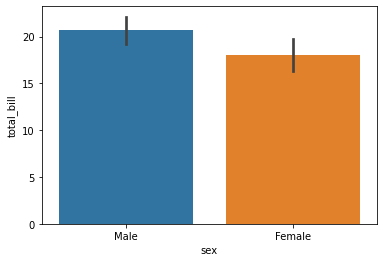

In [5]:
sns.barplot(x='sex', y='total_bill', data=df)

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

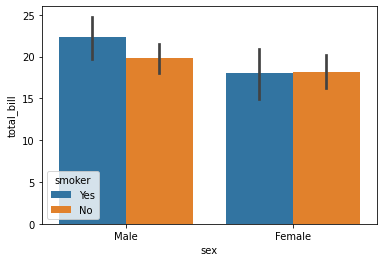

In [6]:
sns.barplot(x='sex', y='total_bill', data=df, hue='smoker')

In [8]:
df.groupby(by=['sex', 'smoker'])

In [9]:
dfg = df.groupby(by=['sex', 'smoker'])

In [12]:
dfg.mean()

total_bill       tip      size
sex    smoker                                
Male   Yes      22.284500  3.051167  2.500000
       No       19.791237  3.113402  2.711340
Female Yes      17.977879  2.931515  2.242424
       No       18.105185  2.773519  2.592593

In [13]:
dfg.total_bill.mean()

sex     smoker
Male    Yes       22.284500
        No        19.791237
Female  Yes       17.977879
        No        18.105185
Name: total_bill, dtype: float64

In [16]:
dfg['total_bill'].mean()

sex     smoker
Male    Yes       22.284500
        No        19.791237
Female  Yes       17.977879
        No        18.105185
Name: total_bill, dtype: float64

In [17]:
dfres = dfg[['total_bill']].mean()

In [18]:
dfres

total_bill
sex    smoker            
Male   Yes      22.284500
       No       19.791237
Female Yes      17.977879
       No       18.105185

In [19]:
sns.barplot(x='sex', y='total_bill', data=dfres, hue='smoker')

ValueError: Could not interpret input 'sex'

In [20]:
dfres

total_bill
sex    smoker            
Male   Yes      22.284500
       No       19.791237
Female Yes      17.977879
       No       18.105185

In [23]:
dfres_reset = dfres.reset_index()

In [21]:
dfres.keys()

Index(['total_bill'], dtype='object')

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

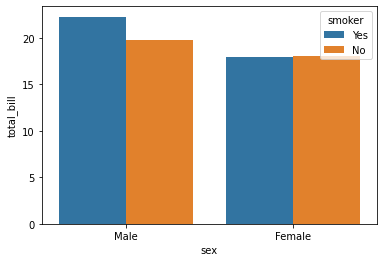

In [24]:
sns.barplot(x='sex', y='total_bill', data=dfres_reset, hue='smoker')

In [25]:
dfres

total_bill
sex    smoker            
Male   Yes      22.284500
       No       19.791237
Female Yes      17.977879
       No       18.105185

In [27]:
df.pivot_table(values='total_bill', index='sex', columns='smoker')

smoker,Yes,No
sex,,
Male,22.284500,19.791237
Female,17.977879,18.105185


In [28]:
df.pivot_table(values='total_bill', index=['sex', 'day'], columns='smoker')

smoker             Yes         No
sex    day                       
Male   Thur  19.171000  18.486500
       Fri   20.452500  17.475000
       Sat   21.837778  19.929063
       Sun   26.141333  20.403256
Female Thur  19.218571  16.014400
       Fri   12.654286  19.365000
       Sat   20.266667  19.003846
       Sun   16.540000  20.824286

In [30]:
df.pivot_table(values='total_bill', index=['sex', 'day'], columns=['smoker', 'time'])

smoker             Yes                    No           
time             Lunch     Dinner      Lunch     Dinner
sex    day                                             
Male   Thur  19.171000        NaN  18.486500        NaN
       Fri   11.386667  25.892000        NaN  17.475000
       Sat         NaN  21.837778        NaN  19.929063
       Sun         NaN  26.141333        NaN  20.403256
Female Thur  19.218571        NaN  15.899167  18.780000
       Fri   13.260000  12.200000  15.980000  22.750000
       Sat         NaN  20.266667        NaN  19.003846
       Sun         NaN  16.540000        NaN  20.824286

In [61]:
import pandas as pd

In [62]:
import numpy as np

In [ ]:
np.pct

In [63]:
dfres = df.pivot_table(values='total_bill',
                       index=['sex', 'day'],
                       columns=['smoker', 'time'],
                       aggfunc=['sum']).div(len(df.index)).mul(100)

In [65]:
dfres = df.pivot_table(values='total_bill',
                       index=['sex', 'day'],
                       columns=['smoker', 'time'],
                       aggfunc=['sum', 'size'])

AssertionError: Cannot concat indices that do not have the same number of levels

In [66]:
dfres = df.pivot_table(values='total_bill',
                       index=['sex', 'day'],
                       columns=['smoker', 'time'],
                       aggfunc=['sum', 'mean'])

In [67]:
dfres

sum                               mean                        \
smoker          Yes              No                Yes                    No   
time          Lunch  Dinner   Lunch  Dinner      Lunch     Dinner      Lunch   
sex    day                                                                     
Male   Thur  191.71    0.00  369.73    0.00  19.171000        NaN  18.486500   
       Fri    34.16  129.46    0.00   34.95  11.386667  25.892000        NaN   
       Sat     0.00  589.62    0.00  637.73        NaN  21.837778        NaN   
       Sun     0.00  392.12    0.00  877.34        NaN  26.141333        NaN   
Female Thur  134.53    0.00  381.58   18.78  19.218571        NaN  15.899167   
       Fri    39.78   48.80   15.98   22.75  13.260000  12.200000  15.980000   
       Sat     0.00  304.00    0.00  247.05        NaN  20.266667        NaN   
       Sun     0.00   66.16    0.00  291.54        NaN  16.540000        NaN   

                        
smoker                  
time            Dinner  
sex    day              
Male   Thur        NaN  
       Fri   17.475000  
       Sat   19.929063  
       Sun   20.403256  
Female Thur  18.780000  
       Fri   22.750000  
       Sat   19.003846  
       Sun   20.824286

In [68]:
dfres.loc['Male']

sum                               mean                      \
smoker     Yes              No                Yes                  No   
time     Lunch  Dinner   Lunch  Dinner      Lunch     Dinner    Lunch   
day                                                                     
Thur    191.71    0.00  369.73    0.00  19.171000        NaN  18.4865   
Fri      34.16  129.46    0.00   34.95  11.386667  25.892000      NaN   
Sat       0.00  589.62    0.00  637.73        NaN  21.837778      NaN   
Sun       0.00  392.12    0.00  877.34        NaN  26.141333      NaN   

                   
smoker             
time       Dinner  
day                
Thur          NaN  
Fri     17.475000  
Sat     19.929063  
Sun     20.403256

In [69]:
dfres.loc[:]

sum                               mean                        \
smoker          Yes              No                Yes                    No   
time          Lunch  Dinner   Lunch  Dinner      Lunch     Dinner      Lunch   
sex    day                                                                     
Male   Thur  191.71    0.00  369.73    0.00  19.171000        NaN  18.486500   
       Fri    34.16  129.46    0.00   34.95  11.386667  25.892000        NaN   
       Sat     0.00  589.62    0.00  637.73        NaN  21.837778        NaN   
       Sun     0.00  392.12    0.00  877.34        NaN  26.141333        NaN   
Female Thur  134.53    0.00  381.58   18.78  19.218571        NaN  15.899167   
       Fri    39.78   48.80   15.98   22.75  13.260000  12.200000  15.980000   
       Sat     0.00  304.00    0.00  247.05        NaN  20.266667        NaN   
       Sun     0.00   66.16    0.00  291.54        NaN  16.540000        NaN   

                        
smoker                  
time            Dinner  
sex    day              
Male   Thur        NaN  
       Fri   17.475000  
       Sat   19.929063  
       Sun   20.403256  
Female Thur  18.780000  
       Fri   22.750000  
       Sat   19.003846  
       Sun   20.824286

In [76]:
dfres.loc[:,['mean','Yes']]

KeyError: "['Yes'] not in index"

In [78]:
'mean'['Yes']

<>:1: SyntaxWarning: str indices must be integers or slices, not str; perhaps you missed a comma?
<>:1: SyntaxWarning: str indices must be integers or slices, not str; perhaps you missed a comma?
/var/folders/3v/9strff0n11gg43ttfl_2d1p80000gn/T/ipykernel_1130/3685951008.py:1: SyntaxWarning: str indices must be integers or slices, not str; perhaps you missed a comma?
  'mean'['Yes']
/var/folders/3v/9strff0n11gg43ttfl_2d1p80000gn/T/ipykernel_1130/3685951008.py:1: SyntaxWarning: str indices must be integers or slices, not str; perhaps you missed a comma?
  'mean'['Yes']
/var/folders/3v/9strff0n11gg43ttfl_2d1p80000gn/T/ipykernel_1130/3685951008.py:1: SyntaxWarning: str indices must be integers or slices, not str; perhaps you missed a comma?
  'mean'['Yes']


TypeError: string indices must be integers

In [79]:
dfres.loc[:,'mean']

smoker             Yes                    No           
time             Lunch     Dinner      Lunch     Dinner
sex    day                                             
Male   Thur  19.171000        NaN  18.486500        NaN
       Fri   11.386667  25.892000        NaN  17.475000
       Sat         NaN  21.837778        NaN  19.929063
       Sun         NaN  26.141333        NaN  20.403256
Female Thur  19.218571        NaN  15.899167  18.780000
       Fri   13.260000  12.200000  15.980000  22.750000
       Sat         NaN  20.266667        NaN  19.003846
       Sun         NaN  16.540000        NaN  20.824286

In [70]:
dfres.loc[:,'Thur']

KeyError: 'Thur'

In [39]:
a = dfres.round(2)

In [41]:
a.style.background_gradient()

In [44]:
dfres.style.format(formatter='{:.2f}')

In [47]:
dfres.style.format(formatter='{.2}')

AttributeError: 'float' object has no attribute '2'

In [48]:
dfres.style.format(formatter='{.2f}')

AttributeError: 'float' object has no attribute '2f'

In [55]:
dfres.style.format(formatter='{:.2f}').background_gradient()

In [52]:
a = dfres.style.format(formatter='{:.2f}')

In [54]:
a.background_gradient()

In [49]:
dfres.style.format(formatter='{:.2f}')

In [44]:
dfres.style.format(formatter='{:.2f}')

In [43]:
dfres.style.bar()

In [38]:
dfres.style.background_gradient()

In [36]:
dfres.style.background_gradient()

In [34]:
dfres.style.background_gradient()

In [31]:
df.pivot_table(values='total_bill', index=['sex', 'day'], columns=['smoker', 'time'], aggfunc='sum')

smoker          Yes              No        
time          Lunch  Dinner   Lunch  Dinner
sex    day                                 
Male   Thur  191.71    0.00  369.73    0.00
       Fri    34.16  129.46    0.00   34.95
       Sat     0.00  589.62    0.00  637.73
       Sun     0.00  392.12    0.00  877.34
Female Thur  134.53    0.00  381.58   18.78
       Fri    39.78   48.80   15.98   22.75
       Sat     0.00  304.00    0.00  247.05
       Sun     0.00   66.16    0.00  291.54

In [11]:
dfg.get_group(('Male', 'Yes'))

,total_bill,tip,sex,smoker,day,time,size
56,38.01,3.00,Male,Yes,Sat,Dinner,4
58,11.24,1.76,Male,Yes,Sat,Dinner,2
60,20.29,3.21,Male,Yes,Sat,Dinner,2
61,13.81,2.00,Male,Yes,Sat,Dinner,2
62,11.02,1.98,Male,Yes,Sat,Dinner,2
63,18.29,3.76,Male,Yes,Sat,Dinner,4
69,15.01,2.09,Male,Yes,Sat,Dinner,2
76,17.92,3.08,Male,Yes,Sat,Dinner,2
80,19.44,3.00,Male,Yes,Thur,Lunch,2
83,32.68,5.00,Male,Yes,Thur,Lunch,2


# Hierarchical Index vs Reset Index

In [135]:
df.Date.dt.month


0        7
1        7
2        7
3        7
4        7
        ..
8460    12
8461    12
8462    12
8463    12
8464    12
Name: Date, Length: 8465, dtype: int64

In [137]:
df.Date.dt.month_name()

0           July
1           July
2           July
3           July
4           July
          ...   
8460    December
8461    December
8462    December
8463    December
8464    December
Name: Date, Length: 8465, dtype: object

In [141]:
df['Mes']=df.Date.dt.month_name()

In [145]:
df.groupby('Mes').std()

,Open,High,Low,Close,Volume,Adj Close
Mes,,,,,,
April,148.655948,150.008568,146.847937,148.380320,8.974955e+07,21.736270
August,143.506873,144.771135,142.317809,143.651341,8.464404e+07,20.844121
December,139.852936,140.922500,138.504133,139.608770,7.090524e+07,20.473905
February,138.324449,139.697850,137.224993,138.572360,8.203619e+07,20.405334
January,137.478072,138.469360,136.047069,137.155410,1.205326e+08,20.186313
July,131.871546,133.132108,130.778264,132.201635,8.440246e+07,20.457059
June,131.811808,132.779305,130.449114,131.597481,7.079246e+07,22.717896
March,144.447049,145.532116,143.133881,144.476170,7.731104e+07,21.139576
May,152.665514,154.122374,151.236113,152.723116,6.974225e+07,22.523713


In [149]:
df

,Date,Open,High,Low,Close,Volume,Adj Close,Mes
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35,July
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97,July
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03,July
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48,July
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52,July
...,...,...,...,...,...,...,...,...
8460,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41,December
8461,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40,December
8462,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39,December
8463,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42,December


In [150]:
dfh = df.groupby(by =[df.Date.dt.year,'Mes']).std()

In [152]:
import seaborn as sns

In [ ]:
slice

In [153]:
dfh

Open        High         Low       Close        Volume  \
Date Mes                                                                      
1980 December    3.844498    3.844273    3.843764    3.843764  2.903914e+07   
1981 April       1.351981    1.370196    1.359052    1.359052  3.061672e+06   
     August      2.417352    2.413328    2.407716    2.407716  3.619826e+06   
     December    1.589435    1.595780    1.606705    1.606705  6.484936e+06   
     February    1.402541    1.444448    1.440974    1.440974  1.290692e+06   
...                   ...         ...         ...         ...           ...   
2014 January    19.044377   18.418552   18.689897   18.902535  4.583371e+07   
     July        1.128774    1.301780    0.482359    1.129225  1.805308e+07   
     June      238.805672  240.800419  237.217136  239.540240  2.211273e+07   
     March       5.719830    5.132560    4.883487    4.915319  1.369242e+07   
     May        14.672119   15.609068   14.566504   15.043816  2.297492e+07   

               Adj Close  
Date Mes                  
1980 December   0.061153  
1981 April      0.020817  
     August     0.037346  
     December   0.025736  
     February   0.023069  
...                  ...  
2014 January    2.668667  
     July       1.129225  
     June       1.184371  
     March      0.697230  
     May        2.226942  

[404 rows x 6 columns]

In [154]:
sns.barplot(x=dfh['Mes'], y=dfh['Close'])

KeyError: 'Mes'

# For loop in groupby

In [83]:
for i in df.groupby('sex'):
    print(i[0])

Male
Female


In [84]:
for i in df.groupby('sex'):
    print(i[1])

     total_bill   tip   sex smoker  day    time  size
1         10.34  1.66  Male     No  Sun  Dinner     3
2         21.01  3.50  Male     No  Sun  Dinner     3
3         23.68  3.31  Male     No  Sun  Dinner     2
5         25.29  4.71  Male     No  Sun  Dinner     4
6          8.77  2.00  Male     No  Sun  Dinner     2
..          ...   ...   ...    ...  ...     ...   ...
236       12.60  1.00  Male    Yes  Sat  Dinner     2
237       32.83  1.17  Male    Yes  Sat  Dinner     2
239       29.03  5.92  Male     No  Sat  Dinner     3
241       22.67  2.00  Male    Yes  Sat  Dinner     2
242       17.82  1.75  Male     No  Sat  Dinner     2

[157 rows x 7 columns]
     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
11        35.26  5.00  Female     No   Sun  Dinner     4
14        14.83  3.02  Female     No   Sun  Dinner     2
16        10.33  1.67  Female     No   Sun 

In [85]:
for i,j in df.groupby('sex'):
    print(i)

Male
Female


In [86]:
for i,j in df.groupby('sex'):
    print(i[0])

M
F


In [88]:
import matplotlib.pyplot as plt

In [91]:
for i in df.groupby('sex'):
    print(i[0])

Male
Female


In [94]:
lista = [3,4]

In [95]:
lista[1]

4

In [96]:
lista[1] = 'hola'

In [97]:
lista

[3, 'hola']

In [98]:
tupla = (3,4)

In [99]:
tupla[1]

4

In [100]:
tupla[1] = 'hola'

TypeError: 'tuple' object does not support item assignment

In [104]:
df.time[1] = 'Hulio Iglesias'

TypeError: Cannot setitem on a Categorical with a new category (Hulio Iglesias), set the categories first

In [108]:
df.loc[1, 'time']

'Dinner'

In [109]:
df.loc[1, 'time'] = 'Hulio Iglesias'

TypeError: Cannot setitem on a Categorical with a new category (Hulio Iglesias), set the categories first

In [110]:
df.time.astype(dtype=str)

0      Dinner
1      Dinner
2      Dinner
3      Dinner
4      Dinner
        ...  
239    Dinner
240    Dinner
241    Dinner
242    Dinner
243    Dinner
Name: time, Length: 244, dtype: object

In [113]:
df.time = df.time.astype(dtype='str')

In [116]:
df.time[1]= 'Hulio Iglesias'

/var/folders/3v/9strff0n11gg43ttfl_2d1p80000gn/T/ipykernel_1130/3154485896.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.time[1]= 'Hulio Iglesias'


In [117]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Hulio Iglesias,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [116]:
df.time[1]= 'Hulio Iglesias'

/var/folders/3v/9strff0n11gg43ttfl_2d1p80000gn/T/ipykernel_1130/3154485896.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.time[1]= 'Hulio Iglesias'


In [119]:
df.loc[2, 'time'] = 'Hulio Iglesias'

In [121]:
df.loc[:, 'time'] = 'Hulio Iglesias'

In [123]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Hulio Iglesias,2
1,10.34,1.66,Male,No,Sun,Hulio Iglesias,3
2,21.01,3.50,Male,No,Sun,Hulio Iglesias,3
3,23.68,3.31,Male,No,Sun,Hulio Iglesias,2
4,24.59,3.61,Female,No,Sun,Hulio Iglesias,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Hulio Iglesias,3
240,27.18,2.00,Female,Yes,Sat,Hulio Iglesias,2
241,22.67,2.00,Male,Yes,Sat,Hulio Iglesias,2
242,17.82,1.75,Male,No,Sat,Hulio Iglesias,2


In [124]:
df.loc[df.tip > 2, 'size'] = 10

In [125]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Hulio Iglesias,2
1,10.34,1.66,Male,No,Sun,Hulio Iglesias,3
2,21.01,3.50,Male,No,Sun,Hulio Iglesias,10
3,23.68,3.31,Male,No,Sun,Hulio Iglesias,10
4,24.59,3.61,Female,No,Sun,Hulio Iglesias,10
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Hulio Iglesias,10
240,27.18,2.00,Female,Yes,Sat,Hulio Iglesias,2
241,22.67,2.00,Male,Yes,Sat,Hulio Iglesias,2
242,17.82,1.75,Male,No,Sat,Hulio Iglesias,2


In [120]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Hulio Iglesias,3
2,21.01,3.50,Male,No,Sun,Hulio Iglesias,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [105]:
df.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [105]:
df.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [103]:
df.time[1]

'Dinner'

In [92]:
for i in df.groupby('sex'):
    print(i)

('Male',      total_bill   tip   sex smoker  day    time  size
1         10.34  1.66  Male     No  Sun  Dinner     3
2         21.01  3.50  Male     No  Sun  Dinner     3
3         23.68  3.31  Male     No  Sun  Dinner     2
5         25.29  4.71  Male     No  Sun  Dinner     4
6          8.77  2.00  Male     No  Sun  Dinner     2
..          ...   ...   ...    ...  ...     ...   ...
236       12.60  1.00  Male    Yes  Sat  Dinner     2
237       32.83  1.17  Male    Yes  Sat  Dinner     2
239       29.03  5.92  Male     No  Sat  Dinner     3
241       22.67  2.00  Male    Yes  Sat  Dinner     2
242       17.82  1.75  Male     No  Sat  Dinner     2

[157 rows x 7 columns])
('Female',      total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
11        35.26  5.00  Female     No   Sun  Dinner     4
14        14.83  3.02  Female     No   Sun  Dinner     2
16        10.33  1.67 

In [93]:
for i in df.groupby('sex'):
    print(i[1])

     total_bill   tip   sex smoker  day    time  size
1         10.34  1.66  Male     No  Sun  Dinner     3
2         21.01  3.50  Male     No  Sun  Dinner     3
3         23.68  3.31  Male     No  Sun  Dinner     2
5         25.29  4.71  Male     No  Sun  Dinner     4
6          8.77  2.00  Male     No  Sun  Dinner     2
..          ...   ...   ...    ...  ...     ...   ...
236       12.60  1.00  Male    Yes  Sat  Dinner     2
237       32.83  1.17  Male    Yes  Sat  Dinner     2
239       29.03  5.92  Male     No  Sat  Dinner     3
241       22.67  2.00  Male    Yes  Sat  Dinner     2
242       17.82  1.75  Male     No  Sat  Dinner     2

[157 rows x 7 columns]
     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
11        35.26  5.00  Female     No   Sun  Dinner     4
14        14.83  3.02  Female     No   Sun  Dinner     2
16        10.33  1.67  Female     No   Sun 

In [126]:
for pepa in df.groupby('sex'):
    print(pepa)

('Male',      total_bill   tip   sex smoker  day            time  size
1         10.34  1.66  Male     No  Sun  Hulio Iglesias     3
2         21.01  3.50  Male     No  Sun  Hulio Iglesias    10
3         23.68  3.31  Male     No  Sun  Hulio Iglesias    10
5         25.29  4.71  Male     No  Sun  Hulio Iglesias    10
6          8.77  2.00  Male     No  Sun  Hulio Iglesias     2
..          ...   ...   ...    ...  ...             ...   ...
236       12.60  1.00  Male    Yes  Sat  Hulio Iglesias     2
237       32.83  1.17  Male    Yes  Sat  Hulio Iglesias     2
239       29.03  5.92  Male     No  Sat  Hulio Iglesias    10
241       22.67  2.00  Male    Yes  Sat  Hulio Iglesias     2
242       17.82  1.75  Male     No  Sat  Hulio Iglesias     2

[157 rows x 7 columns])
('Female',      total_bill   tip     sex smoker   day            time  size
0         16.99  1.01  Female     No   Sun  Hulio Iglesias     2
4         24.59  3.61  Female     No   Sun  Hulio Iglesias    10
11        35.26 

In [127]:
for pepa, juana in df.groupby('sex'):
    print(pepa)

Male
Female


In [129]:
for pepa, juana in df.groupby('sex'):
    print(juana)

     total_bill   tip   sex smoker  day            time  size
1         10.34  1.66  Male     No  Sun  Hulio Iglesias     3
2         21.01  3.50  Male     No  Sun  Hulio Iglesias    10
3         23.68  3.31  Male     No  Sun  Hulio Iglesias    10
5         25.29  4.71  Male     No  Sun  Hulio Iglesias    10
6          8.77  2.00  Male     No  Sun  Hulio Iglesias     2
..          ...   ...   ...    ...  ...             ...   ...
236       12.60  1.00  Male    Yes  Sat  Hulio Iglesias     2
237       32.83  1.17  Male    Yes  Sat  Hulio Iglesias     2
239       29.03  5.92  Male     No  Sat  Hulio Iglesias    10
241       22.67  2.00  Male    Yes  Sat  Hulio Iglesias     2
242       17.82  1.75  Male     No  Sat  Hulio Iglesias     2

[157 rows x 7 columns]
     total_bill   tip     sex smoker   day            time  size
0         16.99  1.01  Female     No   Sun  Hulio Iglesias     2
4         24.59  3.61  Female     No   Sun  Hulio Iglesias    10
11        35.26  5.00  Female     No 

In [131]:
for i,j in df.groupby('sex'):
    print(j)
    plt.scatter(x=j.hola)

     total_bill   tip   sex smoker  day            time  size
1         10.34  1.66  Male     No  Sun  Hulio Iglesias     3
2         21.01  3.50  Male     No  Sun  Hulio Iglesias    10
3         23.68  3.31  Male     No  Sun  Hulio Iglesias    10
5         25.29  4.71  Male     No  Sun  Hulio Iglesias    10
6          8.77  2.00  Male     No  Sun  Hulio Iglesias     2
..          ...   ...   ...    ...  ...             ...   ...
236       12.60  1.00  Male    Yes  Sat  Hulio Iglesias     2
237       32.83  1.17  Male    Yes  Sat  Hulio Iglesias     2
239       29.03  5.92  Male     No  Sat  Hulio Iglesias    10
241       22.67  2.00  Male    Yes  Sat  Hulio Iglesias     2
242       17.82  1.75  Male     No  Sat  Hulio Iglesias     2

[157 rows x 7 columns]


AttributeError: 'DataFrame' object has no attribute 'hola'

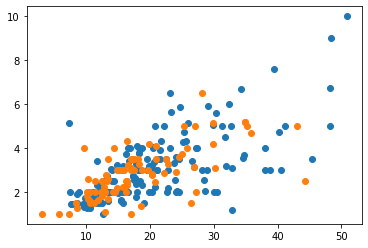

In [132]:
# 1 vuelta
# i = 'Male'
# j = DataFrame

# 2 vuelta
# i = 'Female'
# j = DataFrame

for i,j in df.groupby('sex'):
    plt.scatter(x=j.total_bill, y=j.tip)

In [135]:
j

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Hulio Iglesias,2
4,24.59,3.61,Female,No,Sun,Hulio Iglesias,10
11,35.26,5.00,Female,No,Sun,Hulio Iglesias,10
14,14.83,3.02,Female,No,Sun,Hulio Iglesias,10
16,10.33,1.67,Female,No,Sun,Hulio Iglesias,3
...,...,...,...,...,...,...,...
226,10.09,2.00,Female,Yes,Fri,Hulio Iglesias,2
229,22.12,2.88,Female,Yes,Sat,Hulio Iglesias,10
238,35.83,4.67,Female,No,Sat,Hulio Iglesias,10
240,27.18,2.00,Female,Yes,Sat,Hulio Iglesias,2


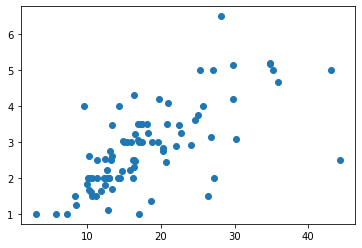

In [134]:
plt.scatter(x=j.total_bill, y=j.tip)

In [82]:
for i in df.groupby('sex'):
    print(i)

('Male',      total_bill   tip   sex smoker  day    time  size
1         10.34  1.66  Male     No  Sun  Dinner     3
2         21.01  3.50  Male     No  Sun  Dinner     3
3         23.68  3.31  Male     No  Sun  Dinner     2
5         25.29  4.71  Male     No  Sun  Dinner     4
6          8.77  2.00  Male     No  Sun  Dinner     2
..          ...   ...   ...    ...  ...     ...   ...
236       12.60  1.00  Male    Yes  Sat  Dinner     2
237       32.83  1.17  Male    Yes  Sat  Dinner     2
239       29.03  5.92  Male     No  Sat  Dinner     3
241       22.67  2.00  Male    Yes  Sat  Dinner     2
242       17.82  1.75  Male     No  Sat  Dinner     2

[157 rows x 7 columns])
('Female',      total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
11        35.26  5.00  Female     No   Sun  Dinner     4
14        14.83  3.02  Female     No   Sun  Dinner     2
16        10.33  1.67 

In [2]:
import seaborn as sns

In [4]:
df = sns.load_dataset('tips')

In [7]:
df.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [10]:
df.select_dtypes('category').upper()

AttributeError: 'DataFrame' object has no attribute 'upper'

In [11]:
df.select_dtypes('category').str.upper()

AttributeError: 'DataFrame' object has no attribute 'str'

In [12]:
df.select_dtypes('category').apply(lambda x: x.str.upper())

,sex,smoker,day,time
0,FEMALE,NO,SUN,DINNER
1,MALE,NO,SUN,DINNER
2,MALE,NO,SUN,DINNER
3,MALE,NO,SUN,DINNER
4,FEMALE,NO,SUN,DINNER
...,...,...,...,...
239,MALE,NO,SAT,DINNER
240,FEMALE,YES,SAT,DINNER
241,MALE,YES,SAT,DINNER
242,MALE,NO,SAT,DINNER


In [8]:
df.select_dtypes('object')

""
0
1
2
3
4
...
239
240
241
242


In [87]:
df = sns.load_dataset('car_crashes', index_col='abbrev')

In [89]:
df.corr()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
total,1.000000,0.611548,0.852613,0.827560,0.956179,-0.199702,-0.036011
speeding,0.611548,1.000000,0.669719,0.588010,0.571976,-0.077675,-0.065928
alcohol,0.852613,0.669719,1.000000,0.732816,0.783520,-0.170612,-0.112547
not_distracted,0.827560,0.588010,0.732816,1.000000,0.747307,-0.174856,-0.075970
no_previous,0.956179,0.571976,0.783520,0.747307,1.000000,-0.156895,-0.006359
ins_premium,-0.199702,-0.077675,-0.170612,-0.174856,-0.156895,1.000000,0.623116
ins_losses,-0.036011,-0.065928,-0.112547,-0.075970,-0.006359,0.623116,1.000000


In [90]:
df.corr().style.background_gradient('Blues')

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
total,1.000000,0.611548,0.852613,0.827560,0.956179,-0.199702,-0.036011
speeding,0.611548,1.000000,0.669719,0.588010,0.571976,-0.077675,-0.065928
alcohol,0.852613,0.669719,1.000000,0.732816,0.783520,-0.170612,-0.112547
not_distracted,0.827560,0.588010,0.732816,1.000000,0.747307,-0.174856,-0.075970
no_previous,0.956179,0.571976,0.783520,0.747307,1.000000,-0.156895,-0.006359
ins_premium,-0.199702,-0.077675,-0.170612,-0.174856,-0.156895,1.000000,0.623116
ins_losses,-0.036011,-0.065928,-0.112547,-0.075970,-0.006359,0.623116,1.000000


In [91]:
df.style.background_gradient('Blues')

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
abbrev,,,,,,,
AL,18.800000,7.332000,5.640000,18.048000,15.040000,784.550000,145.080000
AK,18.100000,7.421000,4.525000,16.290000,17.014000,1053.480000,133.930000
AZ,18.600000,6.510000,5.208000,15.624000,17.856000,899.470000,110.350000
AR,22.400000,4.032000,5.824000,21.056000,21.280000,827.340000,142.390000
CA,12.000000,4.200000,3.360000,10.920000,10.680000,878.410000,165.630000
CO,13.600000,5.032000,3.808000,10.744000,12.920000,835.500000,139.910000
CT,10.800000,4.968000,3.888000,9.396000,8.856000,1068.730000,167.020000
DE,16.200000,6.156000,4.860000,14.094000,16.038000,1137.870000,151.480000
DC,5.900000,2.006000,1.593000,5.900000,5.900000,1273.890000,136.050000


In [92]:
!git clone https://github.com/jsulopz/SQL-exercise.git

Cloning into 'SQL-exercise'...
remote: Enumerating objects: 253, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 253 (delta 28), reused 24 (delta 24), pack-reused 212
Receiving objects: 100% (253/253), 1.22 MiB | 3.34 MiB/s, done.
Resolving deltas: 100% (131/131), done.


In [136]:
'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=IBM&interval=5min&apikey=demo'

'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=IBM&interval=5min&apikey=demo'

In [137]:
'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=APPLE&interval=5min&apikey=demo'

'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=APPLE&interval=5min&apikey=demo'

In [138]:
'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=APPLE&interval=5min&apikey=C8LPFAAFFQXWNI9E'

'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=APPLE&interval=5min&apikey=C8LPFAAFFQXWNI9E'

In [139]:
'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=AAPL&interval=5min&apikey=C8LPFAAFFQXWNI9E'

'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=AAPL&interval=5min&apikey=C8LPFAAFFQXWNI9E'

In [ ]:
plt.scatter(x=j.total_bill, y=j.tip)